# Assignment sheet 3: Numerical Computation and Prinicipal Component Analysis (Deadline: Nov 24, 23:59)

In [3]:
# Set notebook to full width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Computational Issues with Softmax $~$ (3 points)

In the lecture you were introduced to the softmax function which is used to generate probabilities corresponding to the output labels. Typically, the input to the softmax function is a vector of numerical values over the labels and the output is a vector(of same dimension as the input vector) of corresponding probabilities.
**Softmax function is given by,** $~$
$$Softmax(x)_i = \frac{exp(x_i)}{\sum_{j=1}^n exp(x_j)}$$

**Numerical issues might occur when computing softmax functions on a computer which can perform computations
only upto a certain precision.** [Suggested reading $-$ [chapter 4.1 of DeepLearningBook](http://www.deeplearningbook.org/contents/numerical.html)]

$1$. Name these numerical issues and explain them. ($1$ points)

Numerical issues might happen when we are dealing with too small or too big numbers since we need to represent infinitely many real numbers with a finite number of bit patterns.
One issue is underflow; it occurs when numbers near zero are rounded to zero.
The other one is overflow; it occurs when numbers with large magnitude are approximated as $\infty$ or $-\infty$.

$2$. Suggest a remedy (with explanation on why it works) to overcome these numerical issues occuring with Softmax computation. Prove that this remedy actually does not change the softmax criteria. Describe a situation where the proposed remedy still fails to remove instability. ($1$ point)

These difficulties can be resolved by instead evaluating $softmax(z)$ where $ z = x - max_ix_i$. Since we only add or subtract a scalar from the input vector, the result is not effected.

Shortly we will represent the maximum element of vector $x$ with $max$ then; 
$$ \frac{exp(x_i - max)}{\sum_{j=1}^n exp(x_j - max)}$$    

$$ \frac{exp(x_i)exp(-max)}{\sum_{j=1}^n [exp(x_j) exp(-max)]}$$

$$ \frac{exp(x_i)exp(-max)}{(\sum_{j=1}^n exp(x_j)) exp(-max)} = \frac{exp(x_i)}{\sum_{j=1}^n exp(x_j)}$$

However the error still can occur if we implement log softmax(x) by first running the softmax subroutine then passing the result to the log function, we could erroneously obtain $-\infty$.

$3$. First write a naive Softmax implementation, in numpy, that can produce numerical instability. Then write a modified Softmax implementation which is numerically stable.  ($0.5 + 0.5 = 1$ points)

In [1]:
import numpy as np

# TODO : Define inputs
inputs = np.arange(0,60,5)
print (inputs)

def softmax_naive(inputs):
    exp_array = np.exp(inputs)
    return (exp_array/(np.sum(exp_array)))

def softmax_modified(inputs):
    z = inputs - np.amax(inputs) 
    exp_array = np.exp(z)
    return (exp_array/(np.sum(exp_array)))

print (softmax_naive(inputs))
print (softmax_modified(inputs))

[ 0  5 10 15 20 25 30 35 40 45 50 55]
[  1.29082491e-24   1.91575403e-22   2.84323108e-20   4.21972907e-18
   6.26263322e-16   9.29457180e-14   1.37943676e-11   2.04726568e-09
   3.03841167e-07   4.50940274e-05   6.69254707e-03   9.93262053e-01]
[  1.29082491e-24   1.91575403e-22   2.84323108e-20   4.21972907e-18
   6.26263322e-16   9.29457180e-14   1.37943676e-11   2.04726568e-09
   3.03841167e-07   4.50940274e-05   6.69254707e-03   9.93262053e-01]


### Principal Component Analysis $~$ (7 points)

$4$. Is PCA supervised or unsupervised, logically explain your answer. Which is the tunable parameter in PCA?
Briefly explain the role of this parameter in PCA.  ($1+0.5+0.5 = 2$ points)

 1) Unsupervised,PCA helps in producing low dimensional representation of the dataset by identifying a set of linear combination of features which have maximum variance and are mutually un-correlated. This linear dimensionality technique could be helpful in understanding latent interaction between the variable in an unsupervised setting. In a supervised setting such as Classification or Regression, one observes both a set of input variables(X1, .. Xn ) and response or output variables (Y). However, in un-supervised setting the goal is to identify “meaningful” informative patterns in the given data. There is no corresponding output Y of each input X here in PCA. 

 2) Tunable parameter is what we want to reduce the dimension to,here in this Task 4, we reduce dimensions from 2 to 1. 

 3) The encoding formula,  $f(x)=D^Tx$, D contains the eigenvectors corresponding to the larger eigenvalues of $X^TX$, so the column of D represents the degree of matrix after reducing dimensions.In PCA, the eigendecomposition is to tune this parameter, we want to use lower dimensions of data to represents the oringinal one.

$5$. Consider the following data:

setA: ${\bf x}^{(1)}$=$(2, 4)^T$, ${\bf x}^{(2)}$=$(2, 2)^T$, ${\bf x}^{(3)}$=$(3, 1)^T$, ${\bf x}^{(4)}$=$(5, 1)^T$ 

setB: ${\bf x}^{(1)}$=$(-1, 1)^T$, ${\bf x}^{(2)}$=$(-2, 2)^T$, ${\bf x}^{(3)}$=$(-1, 3)^T$, ${\bf x}^{(4)}$=$(-1, 4)^T$

$(a)$ Compress the above sets of vectors into a one-dimensional set using PCA, i.e., derive the encoder function $f(x)=D^{T}x$ as defined in the lecture. Then apply f to the datasets inorder to compress them. ($1.5 + 1.5$ points)

$\mathbf{SetA}=\left[\begin{array}{cccc}
   2 & 4\\
   2 & 2\\
   3 & 1\\
   5 & 1\\
  \end{array}\right]$   ,    Mean of vectors in Set A: $\mathbf{MeanA}=\left[\begin{array}{cccc}
   3 & 2\\ 
  \end{array}\right]$
  Remove mean, $\mathbf{X}=\left[\begin{array}{cccc}
   -1 & 2\\
   -1 & 0\\
   0 & -1\\
   2 & 1\\
  \end{array}\right]$
  
  $\mathbf{x=X^T}=\left[\begin{array}{cccc}
   -1 & -1 & 0 & 2\\
   2 & 0 & -1 & -1\\
  \end{array}\right]$
  
  
  $$\mathbf{X^TX}=\left[\begin{array}{cccc}
   6 & -4\\
  -4 &  6\\
  \end{array}\right] $$Make Eigendecomposition of $X^TX$,
 let $|X^TX-\lambda I|=0$
 The larger eigenvalue is:$\lambda_1=10$
 
 From $|X^TX-10I|=0$, we have D containing the eigenvectors corresponding to the largest eigenvalues of $X^TX$,
  $\mathbf{D_1}=\left[\begin{array}{cccc}
   \frac{\sqrt{2}}{2}\\
  \frac{\sqrt{2}}{-2}
  \end{array}\right]$ 

Now we encode the data,$\mathbf{D_1^Tx}=\left[\begin{array}{cccc}
   \frac{-3\sqrt{2}}{2} &
   \frac{\sqrt{2}}{-2}  &
   \frac{\sqrt{2}}{2}   &
   \frac{3\sqrt{2}}{2}\\
  \end{array}\right]$ 

As to $\mathbf{SetB}=\left[\begin{array}{cccc}
   -1 & 1\\
   -2 & 2\\
   -1 & 3\\
   -1 & 4\\
  \end{array}\right]$,
following the same steps, we have $\mathbf{Y}=\left[\begin{array}{cccc}
   0.25 & -1.5\\
   -0.75 & 0.5\\
   0.25 & 0.5\\
   0.25 & 1.5\\
  \end{array}\right]$ , as to Y,
the larger eigenvalue is $\lambda_2=5.058$,
  $\mathbf{D_2}=\left[\begin{array}{cccc}
   0.1153\\
   0.9933\\
  \end{array}\right]$ 
  Now we encode the data,$\mathbf{D_2^Ty}=\left[\begin{array}{cccc}
   -1.4611 &-0.5831 & 0.5255 & 1.5188
   \\
  \end{array}\right]$ 

$(b)$. For both the above sets sketch the corresponding datasets in a separate figure. 
Also include the reconstructed vectors into the corresponding figures. ($2$ points)

$ reconstructed vector_1=D_1D_1^Tx=\left[\begin{array}{cccc}
   -1.5 & -.5 & 0.5 & 1.5\\
   1.5 & 0.5 &-.5 & -1.5\\
  \end{array}\right]$
  
$ reconstructed vector_2=D_2D_2^Ty=\left[\begin{array}{cccc}
   -0.1685 & -0.0672 & 0.0606 & 0.1751\\
   -1.4513 & -0.5792 & 0.5220 & 1.5083\\
  \end{array}\right]$

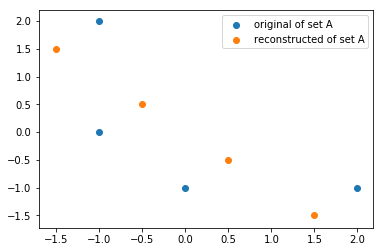

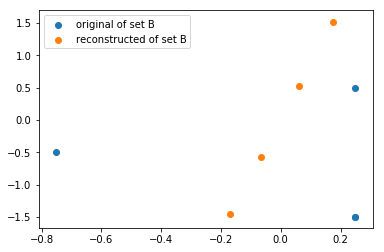

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x1=np.array([-1,-1,0,2])
y1=np.array([2,0,-1,-1])

x1_rec=np.array([-1.5,-0.5,0.5,1.5])
y1_rec=np.array([1.5,0.5,-0.5,-1.5])


plt.scatter(x1, y1)
plt.scatter(x1_rec, y1_rec)

plt.legend(['original of set A', 'reconstructed of set A'], loc='upper right')

plt.show()



x2=np.array([0.25,-0.75,0.25,0.25])
y2=np.array([-1.5,-0.5,0.5,-1.5])

x2_rec=np.array([-0.1685,-0.0672,0.0606,0.1751])
y2_rec=np.array([-1.4513,-0.5792,0.5220,1.5086])


plt.scatter(x2, y2)
plt.scatter(x2_rec, y2_rec)

plt.legend(['original of set B', 'reconstructed of set B'], loc='upper left')

plt.show()

### Gradient descent and Newton's method $~$ (5 points)

**Suppose $f(x) = 2x^3 - 5x + 6$ **

$6$. Write down the mathematical expressions for minimizing f(x) using Gradient descent(GD) and then using Newton's Method(NM). ($1$ points)

- Gradient descent : $x' = x - \epsilon \nabla_x f(x)$ where $x'$ is the updated point, $\nabla_x f(x)$ is the gradient of $f$ and $\epsilon$ is the learning rate, a positive scalar determining the size of the step.
    For the above function $\nabla_x f(x) = 6x^2 - 5$ therefore $x' = x - \epsilon (6x^2 - 5)$.
- Newton's Method : $x' = x - H(f)(x)^{-1} \nabla_x f(x)$ where $ H(f)(x) $ Hessian matrix of $f$. 
    Since we have only one variable in the function the Hessian is $ H(f)(x) = f''(x) $ therefore $x' = x - (12x)^{-1} (6x^2 -5)$.

$7$. Report the updated values of x, both for GD and NM, at $x = 0$. what do you observe? ($1$ points)

- GD: $\nabla_x f(x) = 6x^2 - 5$ at $x = 0$;  $\nabla_x f(0) = - 5$ 

    $x' = 0 - \epsilon \nabla_x f(0)$ therefore the updated value $x' = 5\epsilon $
    assuming $\epsilon = 0.01 $ then we have $x' = 0.05$
    
- NM: $ H(f)(x)_{i,j} = \frac{\partial^2} {\partial x_i \partial x_j} \rightarrow  H(f)(x) = [12x] $ 
     
    $x' = x - (12x)^{-1} (6x^2 -5)$ for $x = 0$ we have $x' = 0$

$8$. Perform GD and NM for the above function using Tensorflow. ($1.5 + 1.5$ points)

In [3]:
import numpy as np
import tensorflow as tf
sess = tf.Session()

x = tf.placeholder(tf.float32)
fx = 2*x**3 - 5*x + 6
dfx = tf.gradients(fx, x)[0]
eps = 0.01
x_upd = x - eps*dfx
x_upd_out = sess.run(x_upd, feed_dict = {x: 0.0})

print (x_upd_out)
# TODO : Implement Gradient Descent with Tensorflow

0.05


In [4]:
import numpy as np
import tensorflow as tf
sess = tf.Session()

x = tf.placeholder(tf.float32)
fx = 2*x**3 - 5*x + 6
dfx = tf.gradients(fx, x)[0]
ddfx = tf.gradients(dfx, x)[0]
x_upd = x - dfx*(ddfx)**(-1)
x_upd_out = sess.run(x_upd, feed_dict = {x: 0.0})

print (x_upd_out)
# TODO : Implement Newton's Method with Tensorflow

inf


### Gradient descent computation and visualisation $~$ (3 + 2 points)

#### Now visualize the Gradient Descent algorithm to fit a straight line to data generated using  $y = \theta_{true}x$ $~$, i.e., use this expression to first produce the data (see code below the lines starting with m=20 and following) and then try to fit a straight line to this data. Fitting a straight line means that you have to approximate this $\theta_{true}$ parameter using the hypothesis or predictive model by minimizing the cost function defined below.

**For this task you should minimize a cost function of the form:**
$$\frac{1}{2m}\sum_{i=1}^m [h_{\theta}(x^i)-y^i]^2$$
where
- $x^i$ is the $i^{th}$ input 

- $y^i$ is the true $i^{th}$ response or output

- $h_{\theta}(x)$ is the hypothesis or predictive model

#### Assume $~$ $h_{\theta}(x) = \theta x$ $~$ to be the hypothesis or predictive model

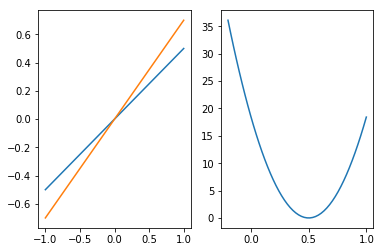

In [5]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Generate the true data which is to be fitted
m = 20                      # number of data points for x
theta_true = 0.5            # corresponds to the true slope
x = np.linspace(-1,1,m)     # x values or inputsm
y = theta_true * x          # True response

# Create a subplot window
# On the left window plot the true data and the approximation that you obtain with different estimates of the slope theta_true
# on the right window plot the cost function 
# TODO : Create the subplot window

def hypothesis(x, theta):
    """Our "hypothesis or predictive model", a straight line through the origin."""
    return x*theta

def cost_func(theta):
    """The cost function describing the goodness of fit."""  
    y_hypo = hypothesis(x, theta)
    return (1/2*m)* np.sum((y_hypo-y)**2)


# First construct a grid of theta parameter and their corresponding
# cost function values.
theta_grid = np.linspace(-0.2,1,50)

cost_values = [cost_func(i) for i in theta_grid]
J_grid = np.matrix([theta_grid, cost_values])

# Find the cost function values to be stored in J_grid
# TODO : Create J_grid


# Plot the cost function as a function of theta.
# TODO : Do the plot
theta1=0.7
y_theta1=theta1 * x 

plt.subplot(121)
plt.plot(x,y)
plt.plot(x,y_theta1)
plt.subplot(122)
plt.plot(theta_grid, cost_values)
plt.show()


# Take N steps with learning rate alpha down the steepest gradient,
# starting at theta = 0.
N = 10
alpha = 1 

#try also 0.02 to see what happens

# this is just a starting value of alpha, 
# you must consider different values of alpha (try using large values)
# and redo the steps below to generate different plots
theta = [0]



# TODO :Compute the N steps down the steepest gradient

# TODO : Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the left window of the subplot in a matching colour.

# TODO : Put the labels, titles and a legend.

#### Now assume that the data is generated using  $y = \theta_1x + \theta_0$
** Following the same logic you applied for the above task define a predictive model 
and perform 5 steps of gradient descent with learning rate alpha = 0.7 **

In [6]:
# Generate the true data which is to be fitted
m = 20
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

# Create the sub-plot: left window is the data, right window will be the cost function.
# TODO


def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    
    # TODO : Implement
    pass

def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    
    # TODO : Implement
    pass


# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)

# TODO : Compute the cost function values


# TODO : Do a labeled contour plot for the cost function on right window of the above subplot


# TODO : Take 5 steps with learning rate alpha = 0.7 down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).


# TODO : Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the left window in a matching colour.


# TODO : Add the labels, titles and a legend to the plot.

### Linear Algebra Bonus
- [Additional material - Linear Algebra Basics](http://www.cs.ubc.ca/~schmidtm/Documents/2009_Notes_LinearAlgebra.pdf)

#### Trace of a Matrix $~$ (3 points)
- [Reading material on Trace](https://en.wikipedia.org/wiki/Trace_(linear_algebra)

Prove that the trace of a ***symmetric positive definite*** matrix is the sum of its eigenvalues.    ($0.5$ points)

- The trace operator gives the sum of all of the diagonal entries of a matrix: 
$$Tr(A)=\sum_i{A_{i,j}}$$
if we choose any orthonormal basis $v_1,…,v_n$ for $\mathbb{R_n}$ (with respect to the standard inner product $\langle\cdot,\cdot\rangle$) then
$$Tr(A)=\sum_i{\langle Av_i,v_i\rangle}$$

If A is symmetric, then by choosing $v_1,…,v_n$ to be an orthonormal basis of eigenvectors of $A$ (with $Avi=\lambda_iv_i$), we immediately get

$$Tr(A)=\sum_i{\langle Av_i,v_i\rangle} = \sum_i{\langle \lambda_iv_i,v_i\rangle} = \sum_i{\lambda_i} $$

Suppose $\mathbf{Y}$ is a $m \times n$ matrix with $m \leq n$ and has ***full rank***, then:



$(a)$.   Give the rank of $\mathbf{Y}$.                                                                 ($0.5$ points)

rank($\mathbf{Y}$) = m

$(b)$.  Show that trace of $\mathbf{Y}^{T}(\mathbf{Y}^T\mathbf{Y})^{-1}\mathbf{Y}$ = rank($\mathbf{Y}$)                                     ($1$ points)

$(c)$. Prove that $\mathbf{Y}^{T}(\mathbf{Y}^T\mathbf{Y})^{-1}\mathbf{Y}$ is the projection matrix w.r.t space defined by $\mathbf{Y}$.     ($1$ points)

#### Jacobian $~$ (3 points)

***[Reading material on Jacobian](https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant)***

Show that the Jacobian determinant of $\frac{\partial(fg, h)}{\partial(u, v)}$ is equal to $\frac{\partial(f, h)}{\partial(u, v)}g + f\frac{\partial(g, h)}{\partial(u, v)}$,

where $f$,$g$, and $h$ are functions of $u$ and $v$ (i.e., $f(u,v)$, $g(u,v)$, and $h(u,v)$)   ($3$ points)

Hint: Use the property $\frac{\partial(y, x)}{\partial(u, v)} = \frac{\partial(y)}{\partial(u)}\frac{\partial(x)}{\partial(v)}-\frac{\partial(y)}{\partial(v)}\frac{\partial(x)}{\partial(u)}$


Direct calculation leads to:
 $\frac{\partial(fg, h)}{\partial(u, v)}$=$\frac{\partial(fg)}{\partial(u)}$$\frac{\partial(h)}{\partial(v)}$-$\frac{\partial(fg)}{\partial(v)}$ $\frac{\partial(h)}{\partial(u)}$=($\frac{\partial(f)}{\partial(u)}g$+$\frac{\partial(g)}{\partial(u)}f)$$\frac{\partial(h)}{\partial(v)}$-($\frac{\partial(f)}{\partial(v)}g$+$\frac{\partial(g)}{\partial(v)}f)$$\frac{\partial(h)}{\partial(u)}$=($\frac{\partial(f)}{\partial(u)}$$\frac{\partial(h)}{\partial(v)}$-$\frac{\partial(f)}{\partial(v)}$$\frac{\partial(h)}{\partial(u)}$)g+($\frac{\partial(g)}{\partial(u)}$$\frac{\partial(h)}{\partial(v)}$-$\frac{\partial(g)}{\partial(v)}$$\frac{\partial(h)}{\partial(u)}$)f=$\frac{\partial(f, h)}{\partial(u, v)}g + f\frac{\partial(g, h)}{\partial(u, v)}$
 
 
 Proved
 
 

#### Hessian $~$ (2 points)
***[Reading material on Hessian](https://en.wikipedia.org/wiki/Hessian_matrix)***

Let $\mathbf{M}=\left[\begin{array}{cccc}
   5 & 1 & 0 & 1\\
   1 & 4 & 1 & 0\\
   0 & 1 & 3 & 1\\
   1 & 0 & 1 & 2\\
  \end{array}\right]$
  
denote the Hessian matrix at particular point for a particular function.

$(a)$. What properties of the functional can you infer from the above information.(give mathematical reasons) ($1$ point)

Set $|M-\lambda I|=0$
The eingenvalues are $1, 3, 4 ,6 $ which are pisitive values, so M is positive defined. It means at this particular point, it is a local minimum.


$(b)$. Provide a generic mathematical representation (e.g. the generic representation of a straight line is $ax+by+c=0$) for the above function. ($1$ point)
$ \frac{5}{2}x_1^2+x_1x_2+x_1x_4+2x_2^2+x_2x_3+x_3x_4+x_4^2+\frac{3x_3^2 }{2}+c=0$